Przygotowanie i eksploracyjna analiza danych

Loading images from class 2:   7%|▋         | 102/1446 [00:00<00:04, 324.91it/s]

inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32)
inny2: (32, 32, 4)


Loading images from class 2:  12%|█▏        | 170/1446 [00:00<00:04, 315.08it/s]

inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32, 4)


Loading images from class 2:  23%|██▎       | 336/1446 [00:01<00:03, 319.90it/s]

inny2: (32, 32, 4)


Loading images from class 3:   3%|▎         | 71/2112 [00:00<00:05, 351.99it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 3:   9%|▉         | 190/2112 [00:00<00:05, 384.02it/s]

inny3: (32, 32, 4)


Loading images from class 3:  13%|█▎        | 267/2112 [00:00<00:04, 374.83it/s]

inny3: (32, 32, 4)


Loading images from class 3:  16%|█▋        | 344/2112 [00:00<00:04, 375.42it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 3:  20%|█▉        | 419/2112 [00:01<00:05, 310.05it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 3:  21%|██▏       | 452/2112 [00:01<00:05, 298.26it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 5:  78%|███████▊  | 1304/1668 [00:01<00:01, 354.74it/s] 

inny5: (32, 32, 4)


Loading images from class 8:  10%|▉         | 459/4821 [00:00<00:06, 675.62it/s]

inny8: (32, 32, 4)


Loading images from class 9: 100%|██████████| 1862/1862 [00:01<00:00, 1264.07it/s]


Zakończono ładowanie obrazów...


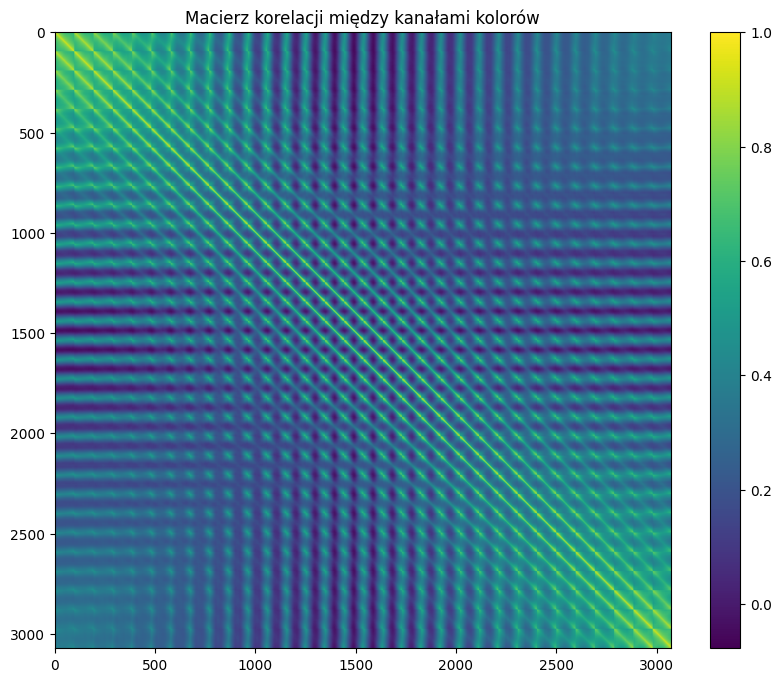

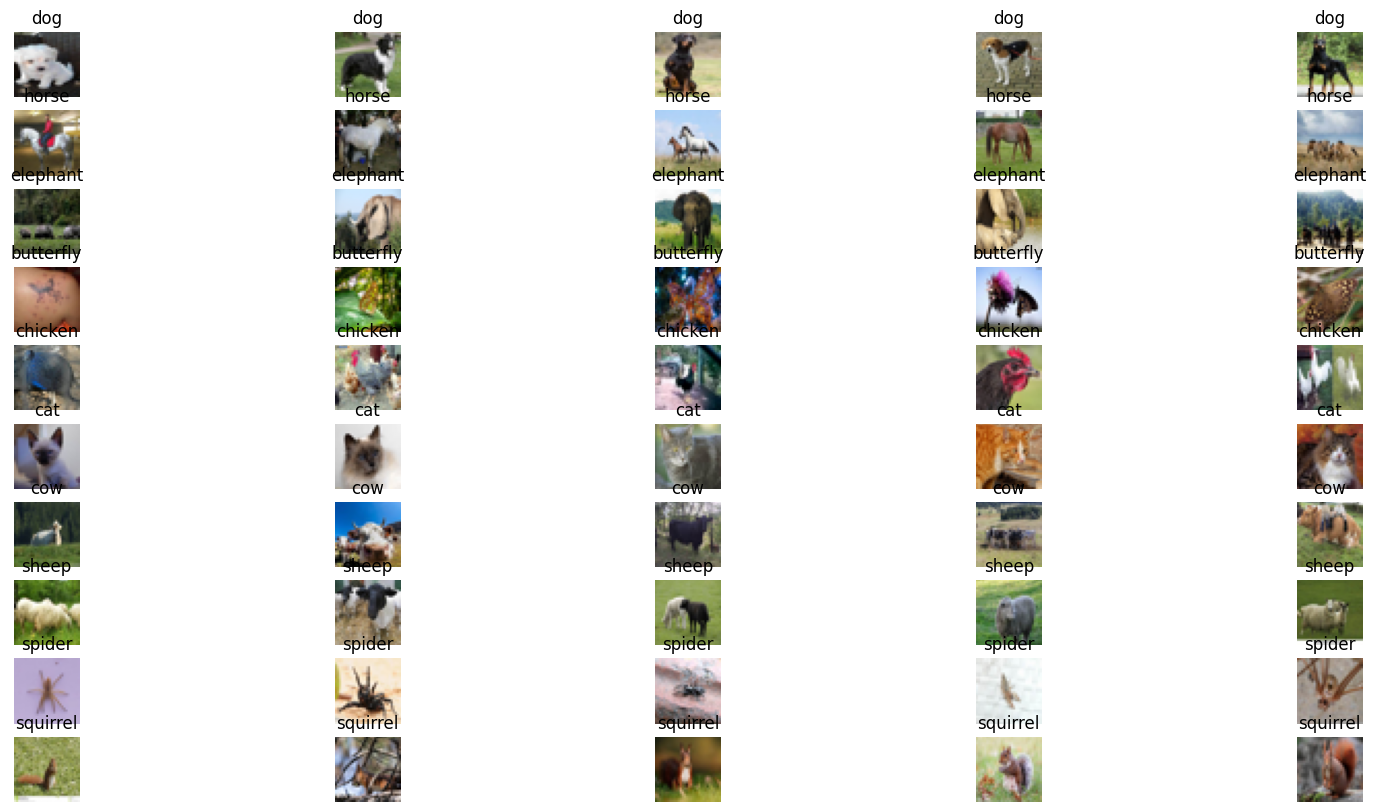

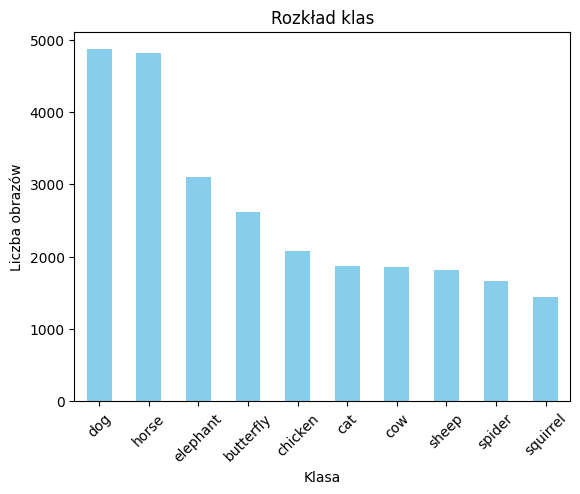

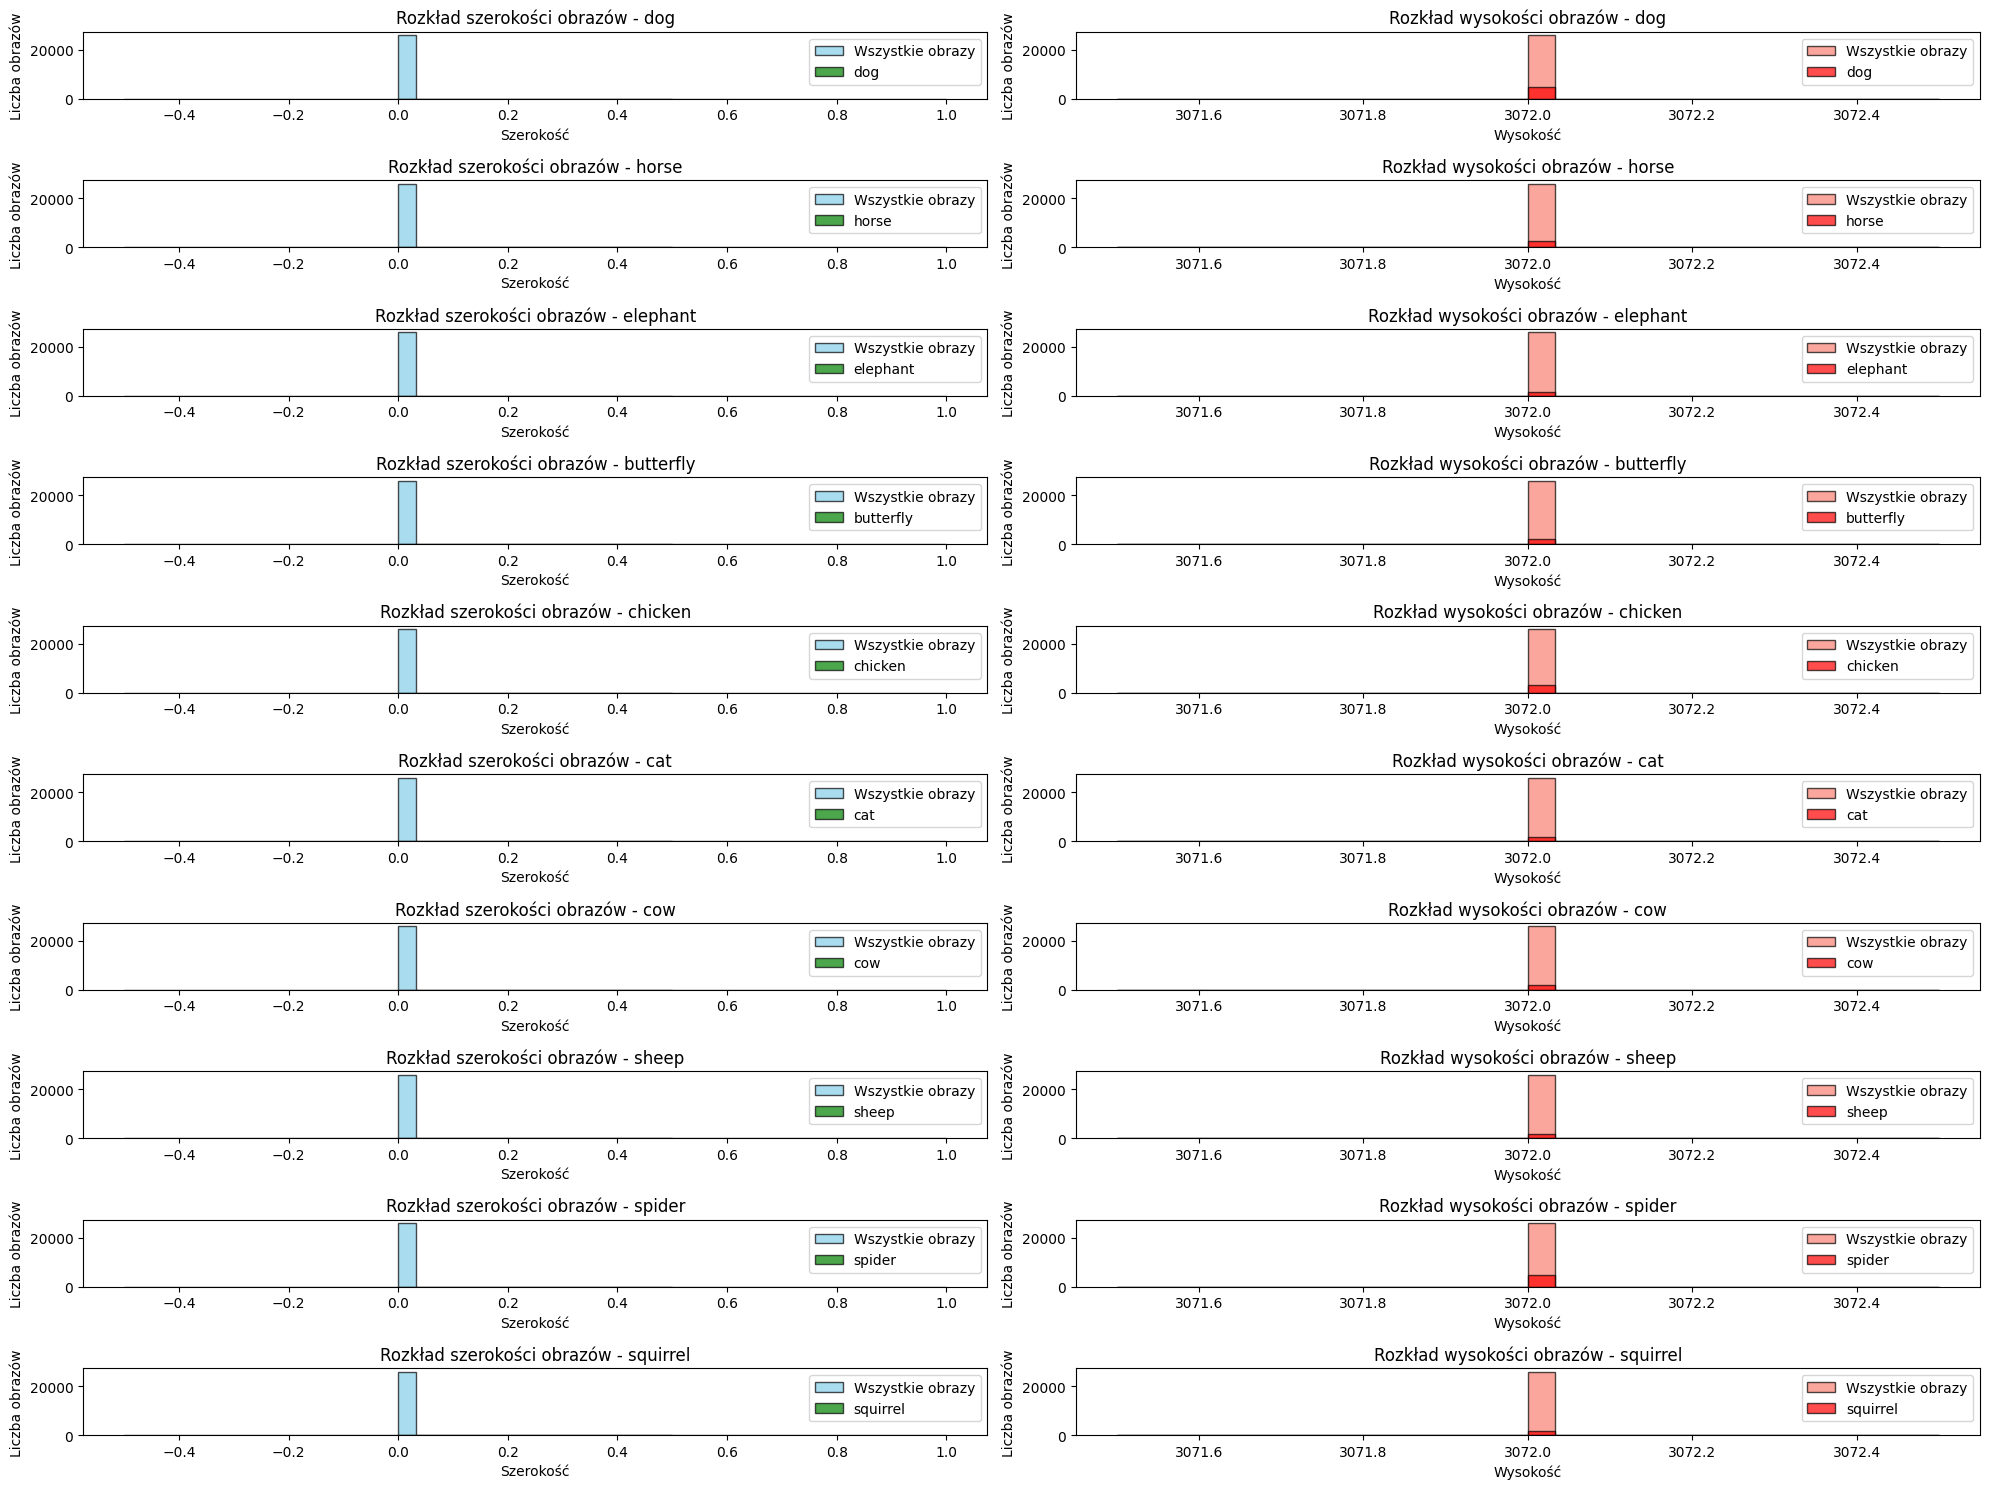

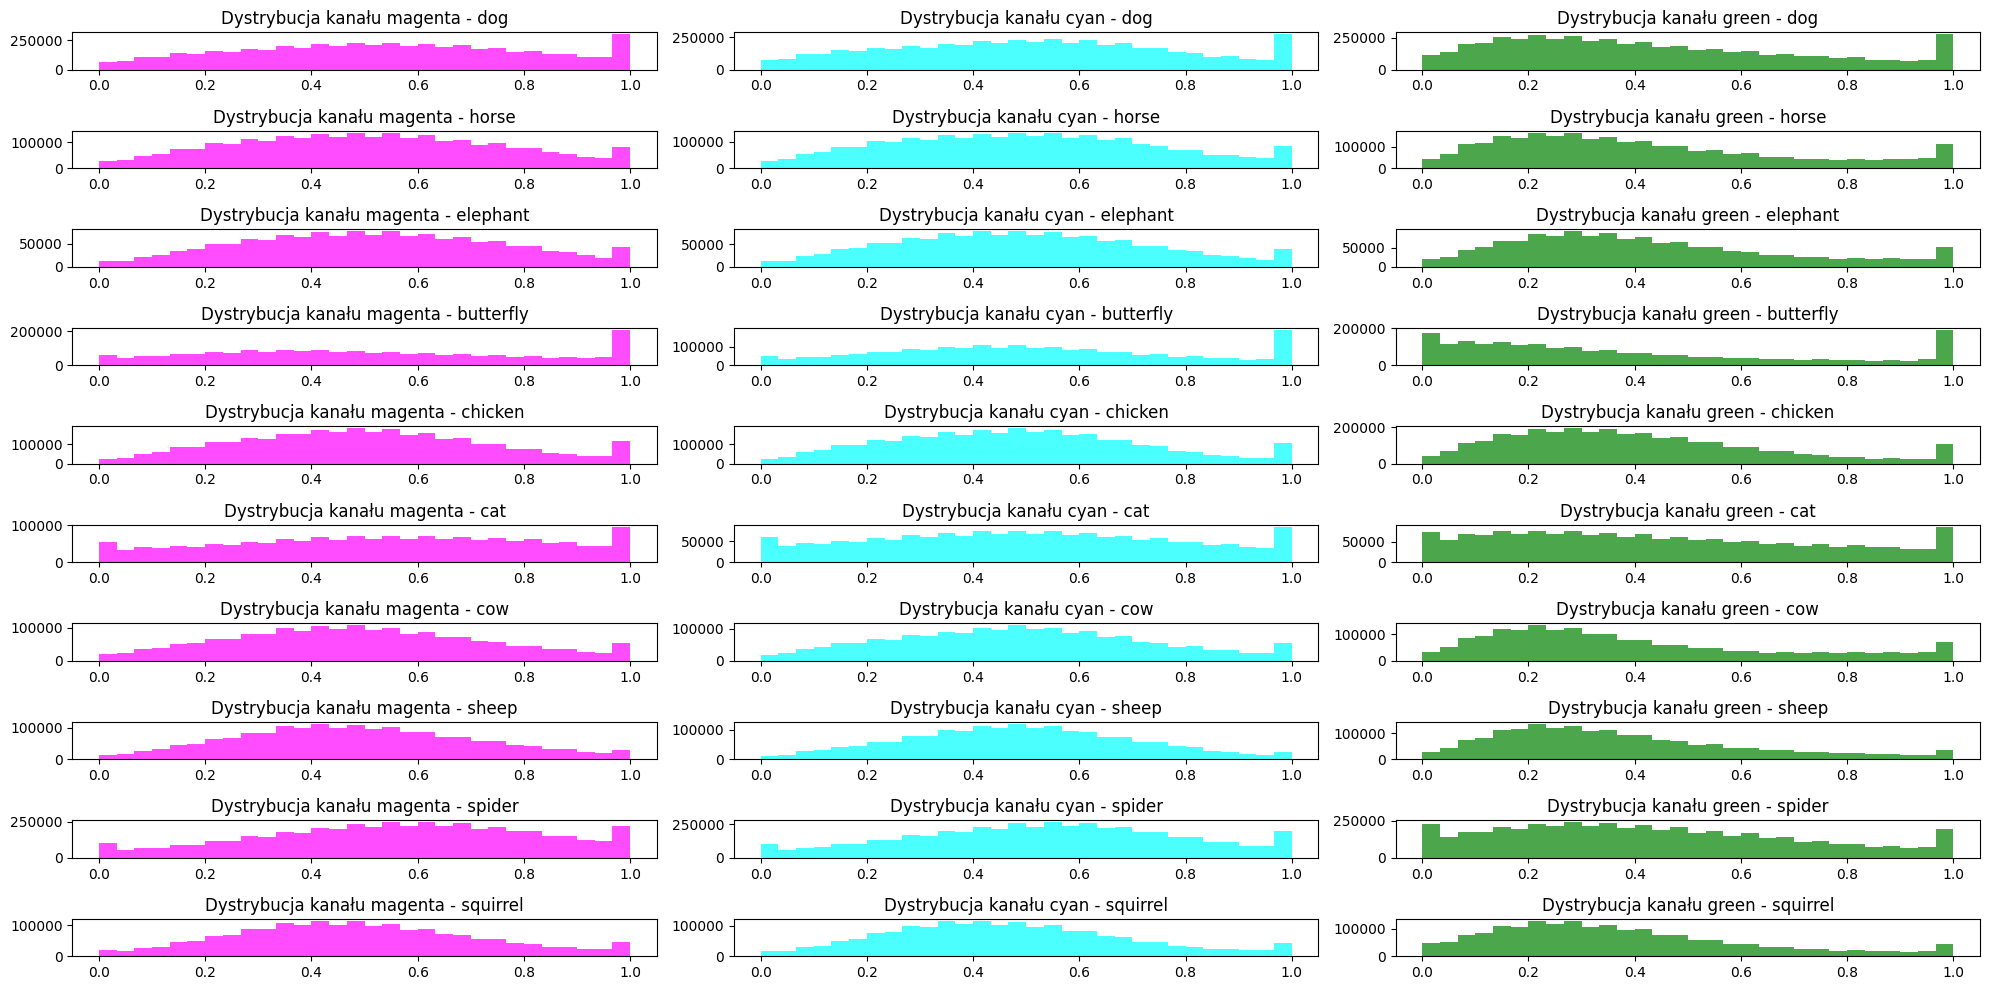

In [15]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


sciezki = ['raw-img/cane', 'raw-img/cavallo', 'raw-img/elefante', 'raw-img/farfalla', 'raw-img/gallina', 'raw-img/gatto', 'raw-img/mucca', 'raw-img/pecora', 'raw-img/ragno', 'raw-img/scoiattolo']

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}

nazwy_klas = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']

train_photos = []
train_labels = []
desired_shape = (32, 32)

def fillArr(sciezka_idx):
    biblioteka = sciezki[sciezka_idx]
    files = os.listdir(biblioteka)
    for filename in tqdm(files, desc=f'Loading images from class {sciezka_idx}'):
        f = os.path.join(biblioteka, filename)
        if os.path.isfile(f):
            try:
                image = Image.open(f)
                image = image.resize(desired_shape)
                photo_array = np.array(image)
                if photo_array.shape == (32, 32, 3):
                    train_photos.append(photo_array.flatten())
                    train_labels.append(sciezka_idx)
                else:
                    print(f'inny{sciezka_idx}: {photo_array.shape}')
            except Exception as e:
                print(f'Błąd podczas wczytywania obrazu {f}: {e}')

for i in range(0, len(sciezki)):
    fillArr(i)

train_photos = np.array(train_photos)
train_photos = train_photos / 255
train_labels = np.array(train_labels)
print("Zakończono ładowanie obrazów...")

# Macierz korelacji między kanałami kolorów
channel_correlation = np.corrcoef(train_photos.reshape(train_photos.shape[0], -1), rowvar=False)

plt.figure(figsize=(10, 8))
plt.imshow(channel_correlation, cmap='viridis')
plt.colorbar()
plt.title('Macierz korelacji między kanałami kolorów')
plt.show()

def display_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(20, 10))
    
    for i, class_name in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        selected_indices = np.random.choice(class_indices, num_images, replace=False)
        
        for j, idx in enumerate(selected_indices):
            plt.subplot(len(class_names), num_images, i * num_images + j + 1)
            
            original_shape = (32, 32, 3)
            reshaped_image = images[idx].reshape(original_shape)
            
            plt.imshow(reshaped_image)
            plt.title(class_name)
            plt.axis('off')

    plt.show()

display_images(train_photos, train_labels, nazwy_klas)

# Analiza rozkładu klas
class_counts = pd.Series(train_labels).value_counts()
class_counts.plot(kind='bar', color='skyblue')
plt.xticks(np.arange(len(nazwy_klas)), nazwy_klas, rotation=45)
plt.xlabel('Klasa')
plt.ylabel('Liczba obrazów')
plt.title('Rozkład klas')
plt.show()

# Analiza rozkładu wielkości obrazów z uwzględnieniem klas
def plot_image_size_distribution_by_class(images, labels, class_names):
    image_sizes = [image.shape for image in images]

    widths = [size[1] if len(size) > 1 else 0 for size in image_sizes]
    heights = [size[0] if len(size) > 0 else 0 for size in image_sizes]

    plt.figure(figsize=(20, 15))

    for class_idx, class_name in enumerate(class_names):
        class_images = images[labels == class_idx]
        
        plt.subplot(len(class_names), 2, class_idx * 2 + 1)
        plt.hist(widths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.hist([image.shape[1] for image in class_images if len(image.shape) > 1], bins=30, color='green', edgecolor='black', alpha=0.7)
        plt.title(f'Rozkład szerokości obrazów - {class_name}')
        plt.xlabel('Szerokość')
        plt.ylabel('Liczba obrazów')
        plt.legend(['Wszystkie obrazy', f'{class_name}'])

        plt.subplot(len(class_names), 2, class_idx * 2 + 2)
        plt.hist(heights, bins=30, color='salmon', edgecolor='black', alpha=0.7)
        plt.hist([image.shape[0] for image in class_images if len(image.shape) > 0], bins=30, color='red', edgecolor='black', alpha=0.7)
        plt.title(f'Rozkład wysokości obrazów - {class_name}')
        plt.xlabel('Wysokość')
        plt.ylabel('Liczba obrazów')
        plt.legend(['Wszystkie obrazy', f'{class_name}'])

    plt.subplots_adjust(wspace=0.5, hspace=0.5)  
    plt.tight_layout()
    plt.show()

plot_image_size_distribution_by_class(train_photos, train_labels, nazwy_klas)

# Analiza rozkładu kanałów kolorów z uwzględnieniem klas
def plot_color_distribution_by_class(images, labels, class_names):
    plt.figure(figsize=(20, 10))

    for class_idx, class_name in enumerate(class_names):
        class_images = images[labels == class_idx]
        for i in range(3):
            plt.subplot(len(class_names), 3, class_idx * 3 + i + 1)
            channel_values = class_images[:, i::3].flatten()
            plt.hist(channel_values, bins=30, color=['magenta', 'cyan', 'green'][i], alpha=0.7)
            plt.title(f'Dystrybucja kanału {["magenta", "cyan", "green"][i]} - {class_name}')

    plt.tight_layout()
    plt.show()

plot_color_distribution_by_class(train_photos, train_labels, nazwy_klas)


Przygotowanie modeli SVM i KNN

In [19]:
import os
import joblib
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train_photos, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model SVM
try:
    final_model_svm = joblib.load('best_model_svm.pkl')
    print("Model SVM already fitted.")
except FileNotFoundError:
    print("Model SVM not found. Fitting the model...")
    final_model_svm = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
    final_model_svm.fit(X_train_scaled, y_train)
    joblib.dump(final_model_svm, 'best_model_svm.pkl')

train_pred_svm = final_model_svm.predict(X_train_scaled)
val_pred_svm = final_model_svm.predict(X_test_scaled)

classification_report_svm = classification_report(y_test, val_pred_svm)
print(f'Final Accuracy for Training (SVM): {np.mean(train_pred_svm == y_train)}')
print(f'Final Accuracy for Validation (SVM): {np.mean(val_pred_svm == y_test)}')
print('Final Classification Report (SVM):\n', classification_report_svm)

# Model KNN
try:
    final_model_knn = joblib.load('best_model_knn.pkl')
    print("Model KNN already fitted.")
except FileNotFoundError:
    print("Model KNN not found. Fitting the model...")
    final_model_knn = KNeighborsClassifier(n_neighbors=3)
    final_model_knn.fit(X_train_scaled, y_train)
    joblib.dump(final_model_knn, 'best_model_knn.pkl')

train_pred_knn = final_model_knn.predict(X_train_scaled)
val_pred_knn = final_model_knn.predict(X_test_scaled)

classification_report_knn = classification_report(y_test, val_pred_knn)
print(f'Final Accuracy for Training (KNN): {np.mean(train_pred_knn == y_train)}')
print(f'Final Accuracy for Validation (KNN): {np.mean(val_pred_knn == y_test)}')
print('Final Classification Report (KNN):\n', classification_report_knn)


Model SVM already fitted.
Final Accuracy for Training (SVM): 0.993636972538513
Final Accuracy for Validation (SVM): 0.4963643321852277
Final Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.41      0.54      0.46       986
           1       0.56      0.52      0.54       516
           2       0.48      0.33      0.39       310
           3       0.55      0.44      0.49       427
           4       0.54      0.54      0.54       613
           5       0.34      0.26      0.29       330
           6       0.45      0.41      0.43       324
           7       0.49      0.41      0.45       383
           8       0.61      0.69      0.65       964
           9       0.41      0.33      0.37       373

    accuracy                           0.50      5226
   macro avg       0.48      0.45      0.46      5226
weighted avg       0.50      0.50      0.49      5226

Model KNN already fitted.
Final Accuracy for Training (KNN): 0.4827767

Traceback (most recent call last):
  File "d:\PIP\Lib\site-packages\gradio\queueing.py", line 532, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\gradio\blocks.py", line 1923, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\gradio\blocks.py", line 1509, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\anyio\_backends\_asyncio.p

Przygotowanie prostego frontu z użyciem biblioteki Gradio

In [17]:
import gradio as gr

def classify_image(image):
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    image = image.resize(desired_shape)
    image_array = np.array(image).flatten().reshape(1, -1) / 255
    image_scaled = scaler.transform(image_array)
    prediction_svm = final_model_svm.predict(image_scaled)
    prediction_knn = final_model_knn.predict(image_scaled)
    return nazwy_klas[prediction_svm[0]], nazwy_klas[prediction_knn[0]]

iface = gr.Interface(fn=classify_image, inputs="image", outputs=[gr.Textbox(label="SVC Prediction"), gr.Textbox(label="KNN Prediction")], live=True)
iface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "d:\PIP\Lib\site-packages\gradio\queueing.py", line 532, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\gradio\blocks.py", line 1923, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\gradio\blocks.py", line 1509, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PIP\Lib\site-packages\anyio\_backends\_asyncio.p

Strojenie hiperparametrów

In [18]:
# Walidacja krzyżowa dla KNN
neighbors_values = [3, 5, 7, 9, 11, 15, 17, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]

for n_neighbors in neighbors_values:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
    mean_accuracy = np.mean(scores)
    print(f'n_neighbors = {n_neighbors}, Mean Accuracy: {mean_accuracy}')

n_neighbors = 3, Mean Accuracy: 0.3263801956675734
n_neighbors = 5, Mean Accuracy: 0.31681196206580464
n_neighbors = 7, Mean Accuracy: 0.30733911325900143
n_neighbors = 9, Mean Accuracy: 0.3010238158724418
n_neighbors = 11, Mean Accuracy: 0.2967178132105938
n_neighbors = 15, Mean Accuracy: 0.28920658389684933
n_neighbors = 17, Mean Accuracy: 0.28604904392049246
n_neighbors = 20, Mean Accuracy: 0.2791596296300535
n_neighbors = 25, Mean Accuracy: 0.27628923965672925
n_neighbors = 30, Mean Accuracy: 0.2721271095374495
n_neighbors = 40, Mean Accuracy: 0.2652857824585817
n_neighbors = 50, Mean Accuracy: 0.260740602566406
n_neighbors = 60, Mean Accuracy: 0.2553342129867514
n_neighbors = 70, Mean Accuracy: 0.25284647225029155
n_neighbors = 80, Mean Accuracy: 0.24834929946248066
n_neighbors = 90, Mean Accuracy: 0.24648353396373893
n_neighbors = 100, Mean Accuracy: 0.2438999735646219


In [ ]:
# Walidacja krzyżowa dla SVM
C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf', 'poly']

for C in C_values:
    for kernel in kernel_values:
        svm_model = SVC(C=C, kernel=kernel)
        scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
        mean_accuracy = np.mean(scores)
        print(f'C={C}, kernel={kernel}, Mean Cross-Validated Accuracy: {mean_accuracy}')
